# [HW16] K-means Clustering


##1. Introduction to K-Means Clustering



지금까지 저희는 input variable과 target variable이 있고, 이 둘 사이의 관계를 잘 설명해주는 model을 학습하는 과정을 배웠습니다. 

이처럼 target variable이 존재해서 우리가 정답(ground truth)를 알고 있고, 학습에 그것을 사용하는 것을 우리는 지도학습, supervised learning이라고 합니다. 

앞서 실습에서 했던 예시로 알아보면, 우리는 부품의 사진을 보고 그 부품에 결함이 있는지 없는지 알 수 있었고, 그 사실을 학습에 사용했습니다. 이것을 우리는 지도학습이라고 부릅니다. 

하지만 우리가 target variable을 모른다면 어떻게 될까요? 이번 시간에는 우리는 ground truth를 모르고, 사용하지 않은 채로 학습을 하는 비지도학습, unsupervised learning의 알고리즘 중 하나인 **k-means clustering**에 대해서 알아보도록 하겠습니다. 

K-means clustering은 분류가 되어있지 않은 데이터들을 다룰 때 사용합니다. 미리 정해놓은 개수(K)의 클러스터로 주어진 데이터를 묶어내는 방법론입니다. 주어진 데이터들을 반복적으로 K개의 클러스터 중 하나로 할당하는 방법으로 학습이 진행됩니다. 결국 가까운 데이터들 끼리 같은 클러스터에 할당되게 됩니다. 이미지로 나타내면 다음과 같습니다. 

<img src="https://miro.medium.com/max/2160/1*tWaaZX75oumVwBMcKN-eHA.png
" width="700" height="300" />

## 2. K-Means clustering intuition

K-Means clustering은 레이블이 지정되지 않은 데이터를 중심부(centroid)를 기반으로 clustering 을 합니다. 

이 때 중심부는 각 cluster 의 중심을 의미합니다. K-Means clustering은 다음 2가지 step을 반복적으로 수행하면서 이루어집니다. 

1. Data assignment step
각 centroid는 하나의 cluster를 의미합니다. 모든 데이터들은 각자 자신과 가장 가까운 centroid에 해당하는 cluster에 속하게 됩니다. 

2. Centroid update step
각 data가 cluster에 배정이 되었다면, 이제 cluster에 속해 있는 data들의 평균 위치로 centroid가 다시 갱신됩니다. 

더이상 data들의 cluster가 변하지 않을 때까지 이 두가지 과정을 반복적으로 수행하게 됩니다. 이 알고리즘은 반드시 수렴하게 되어있지만 초기화 하는 방식에 따라서 local optimum으로 수렴하게 될 수도 있습니다. K-Means clustering의 과정을 그림으로 보겠습니다. 

<img src="https://i.ytimg.com/vi/_aWzGGNrcic/hqdefault.jpg
" width="600" height="450" />

## 3. Choosing the value of K

K-Means algorithm은 우리가 미리 정해놓은 K에 값에 따라서 작동하게 됩니다. 그래서 우리는 가장 좋은 K의 값을 찾기 위해 여러가지 K 값으로 알고리즘을 수행해 보고 비교를 통해서 찾아야 합니다. 

가장 좋은 K값을 찾는데에는 여러가지 방법이 있지만 이번 실습에서는 가장 대표적인 **elbow method**를 사용해 보겠습니다. 

## 4. The elbow method

The elbow method는 가장 좋은 K 값을 찾는데 사용하는 방법입니다. 여러가지 K에 대해서 모두 실험을 해보고 해당 cost function을 그래프로 표현한 뒤 최적의 K 값을 찾습니다. 

예시 그래프를 보도록 하겠습니다. 

<img src="https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/995b8b58-06f1-4884-a2a1-f3648428e947.png
" width="700" height="400" />

K가 커질수록 cost function이 줄어듭니다. 그러나 무작정 K의 개수를 키운다면 그것은 clustering 을 하는 의미가 없어집니다. 그래서 cost function이 가장 가파르게 줄어드는 마지막 지점의 K를 선택을 하게 되고 이것이 elbow method 입니다. 

이제부터는 직접 data를 가져와서 진행해보도록 하겠습니다! 

Dataset에 자세한 설명은 아래 링크에 나와있습니다. 

https://www.kaggle.com/uciml/iris


In [ ]:
from urllib.request import urlretrieve
URL = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
urlretrieve(URL, 'Iris.csv')

('Iris.csv', <http.client.HTTPMessage at 0x7f0be26e7c90>)

In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the Iris dataset with pandas
dataset = pd.read_csv('/content/Iris.csv')
x = dataset.iloc[:, [0, 1, 2, 3]].values

In [ ]:
dataset.info()
dataset[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


이제 scikit-learn 속의 Kmeans 패키지를 이용해서 진행해보겠습니다.  

K개수를 1부터 10까지 진행해보면서 cost function인 inertia를 측정해보겠습니다. 

In [ ]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

The elbow method를 사용하기 위해서 그래프를 찍어보겠습니다. 

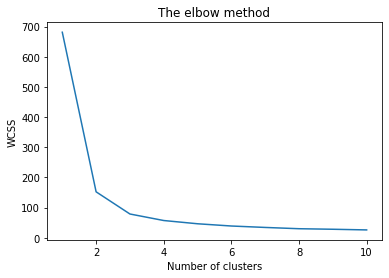

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

K를 3으로 설정을 해서 K-Means 를 수행한 뒤 결과를 보도록 하겠습니다. 

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

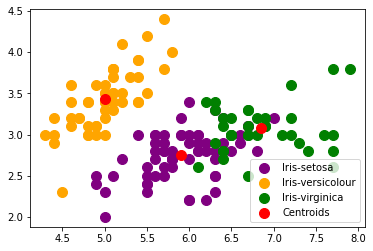

In [ ]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

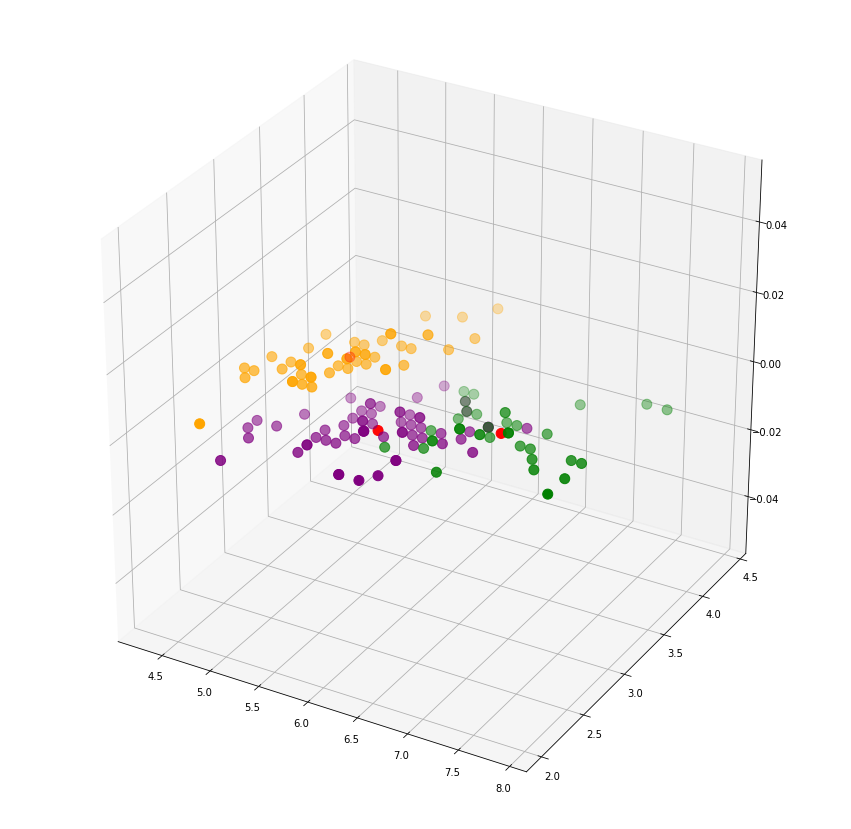

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

오늘은 unsupervised learning 중 하나인 K-Means clustering에 대해서 알아보았습니다. 

다음 시간에는 Neural Network에 대해서 알아보도록 하겠습니다. 

질문 있으면 편하게 해주세요!